In [25]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
import pylab
import statsmodels.api as sm

In [13]:
# PROBLEM 6

data = datasets.load_boston()
lm = linear_model.LinearRegression()
scale = StandardScaler()

# Put data in a dataframe and separate out the target
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = data.target

# Get z-scores of the data, not the target
df_scaled = scale.fit_transform(df)

lm.fit(df_scaled, target)
targeted_lm = lm.predict(df_scaled)

#RMSE
np.sqrt(np.mean((target-targeted_lm)**2))


4.679191295697282

In [3]:
# PROBLEM 7

data = datasets.load_boston()
lm = linear_model.Lasso()
scale = StandardScaler()
PE = []
PE_train = []

# Put data in a dataframe and separate out the target
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = data.target

kf = KFold(n_splits=10, random_state=1234,shuffle=True)

for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    X_train_scaled = scale.fit_transform(X_train)

    y_train = target[train_index]

    X_test = df.values[test_index]
    X_test_scaled = scale.transform(X_test)

    y_test = target[test_index]

    lm.fit(X_train_scaled, y_train)

    y_pred = lm.predict(X_test_scaled)
    y_pred_train = lm.predict(X_train_scaled)

    PE_train.append(MSE(y_train,y_pred_train))
    PE.append(MSE(y_test, y_pred))

print('The k-fold crossvalidated error rate on the train sets is: ' + str(np.mean(PE_train)))
print('The k-fold crossvalidated error rate on the test sets is: ' + str(np.mean(PE)))

The k-fold crossvalidated error rate on the train sets is: 28.337490605967453
The k-fold crossvalidated error rate on the test sets is: 29.97054713821555


In [2]:
# PROBLEM 8

data = datasets.load_boston()
lm = linear_model.ElasticNet(alpha=0.05,l1_ratio=0.9)
scale = StandardScaler()
PE = []
PE_train = []

# Put data in a dataframe and separate out the target
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = data.target

kf = KFold(n_splits=10, random_state=1234,shuffle=True)

for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    X_train_scaled = scale.fit_transform(X_train)

    y_train = target[train_index]

    X_test = df.values[test_index]
    X_test_scaled = scale.transform(X_test)

    y_test = target[test_index]

    lm.fit(X_train_scaled, y_train)

    y_pred = lm.predict(X_test_scaled)
    y_pred_train = lm.predict(X_train_scaled)

    PE_train.append(MSE(y_train,y_pred_train))
    PE.append(MSE(y_test, y_pred))

print('The k-fold crossvalidated error rate on the train sets is: ' + str(np.mean(PE_train)))
print('The k-fold crossvalidated error rate on the test sets is: ' + str(np.mean(PE)))

The k-fold crossvalidated error rate on the train sets is: 21.91631977803622
The k-fold crossvalidated error rate on the test sets is: 24.310376851701204


In [19]:
# PROBLEM 9

data = datasets.load_boston()
model = linear_model.LinearRegression()
scale = StandardScaler()

# Put data in a dataframe and separate out the target
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = data.target

# Get z-scores of the data, not the target
df_scaled = scale.fit_transform(df)

polynomial_features= PolynomialFeatures(degree=2)

df_poly_fit = polynomial_features.fit_transform(np.array(df_scaled))

model.fit(df_poly_fit, target)

predictions = model.predict(df_poly_fit)

print('RMSE: ', str(np.sqrt(np.mean((target-predictions)**2))))




RMSE:  2.448373110242139


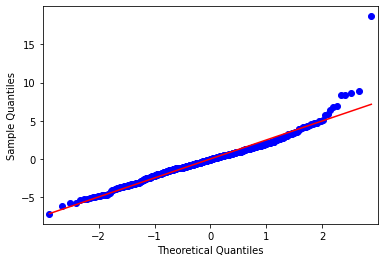

In [26]:
# PROBLEM 10

data = datasets.load_boston()
model = linear_model.Ridge()
scale = StandardScaler()

# Put data in a dataframe and separate out the target
df = pd.DataFrame(data=data.data, columns=data.feature_names)
target = data.target

# Get z-scores of the data, not the target
df_scaled = scale.fit_transform(df)

# Model Operations
polynomial_features= PolynomialFeatures(degree=2)
df_poly_fit = polynomial_features.fit_transform(np.array(df_scaled))
model.fit(df_poly_fit, target)
predictions = model.predict(df_poly_fit)

# Graphing Residuals
residuals = target - predictions

sm.qqplot(residuals, loc = 0, scale = 1, line='s')
pylab.show()